In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [2]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact

## Obremenitveni problem

V primeru, da izbran sistem predstavimo s pomočjo blokvnega diagrama, je osnovna ideja ta, da na izstopni signal bloka vpliva le njegov vstopni signal. Izhod iz bloka se nato uporabi kot vstopni signal v naslednji blok. Implicitna supozicija pa je, da se ob povezavi novega bloka, v prejšnjem bloku nič ne spremeni, kar pa vedno ne drži. T problem običajno imenujemo "obremenitveni problem. V tem interaktivnem primeru je ta problem prikazan na primeru sistemov prikazanih na spodnji sliki.

<table>
    <tr>
        <th style="text-align:center">Shematski prikaz obremenitvenega problema</th>
    </tr>
    <tr>
        <td style><img src='img/loading_problem.png'></td>
    </tr>
    <tr>
    </tr>    
</table>

Z vidika teorije krmiljenja lahko oba sistema ločeno analiziramo in dobimo prenosni funkciji $P_1(s)$ in $P_2(s)$. Če nato bloke med seboj povežemo, lahko rečemo, da je prenosna funkcija kombiniranega sistema $P(s)$ enaka $P_1(s) \cdot P_2(s)$, ker izhod is prvega sistema predstavlja vhod v drugi sistem. Prehodna funkcija kombiniranega sistma je prikazana z oranžno krivuljo na spodnjem grafu (odziv po teoriji krmiljenja).

V kolikor pa sistem analiziramo z elektrotehniškega vidika dobimo različno prenosno funkcijo, katere odziv na enotsko skočno funkcijo je prikazan z zeleno krivuljo na spodnjem grafu ("elektrotehniški" odziv). Razlika med obema odzivoma je posledica obremenitvenega problema. Če je vhodna impedanca drugega sistema precej večja od izhodne impedance prvega sistema, je razlika sicer zanemarljiva v vseh praktičnih aplikacijah.

---

### Kako upravljati s tem interaktivnim primerom?
Z uporabo drsnikov spreminjaj vrednost $R_1$, $R_2$, $L_1$ and $L_2$ in opazuj odziv sistema po teoriji krmiljenja in "elektrotehniški" odziv ter pripadajoči prenosni funkciji. 


<!-- When a systems is represented by a block diagram, the main idea is that an input signal influences the output signal. The output can then be used as an input for a next block. The implicit suppositon is however that when a new block is connected, nothing will change in the previous block. This is however not true. This fact is usually stated as the »Loading problem«. As an example, lets take a look at the two systems shown below.

<table>
    <tr>
        <th style="text-align:center">Schematic representation of the loading problem</th>
    </tr>
    <tr>
        <td style><img src='img/loading_problem.png'></td>
    </tr>
    <tr>
    </tr>    
</table>

From the control theory point of view each of them could be analyzed separately and transfer functions $P_1(s)$ and $P_2(s)$ can be obtained. If the blocks are then connected, we might think that the transfer function of the combined system $P(s)$ is equal to $P_1(s) \cdot P_2(s)$, because the output of the first system is the input for the second system. The step response for this transfer function is shown in orange in the plot below ("control theory" response).

If we however analyze the system from the electrical engineering point of view, we end up with a different transfer function. The associated step response is shown in green in the plot below ("electrical engineering" response). The difference between the two is due to the loading problem.
If however the input impedance of the second system is much higher than the output impedance of the first one, the difference is negligible for all practical purposes.

---

### How to use this notebook?
Move the sliders to change the values of $R_1$, $R_2$, $L_1$ and $L_2$ and observe the "control theory" and "electrical engineering" response together with the corresponding transfer functions. -->

<IPython.core.display.Javascript object>


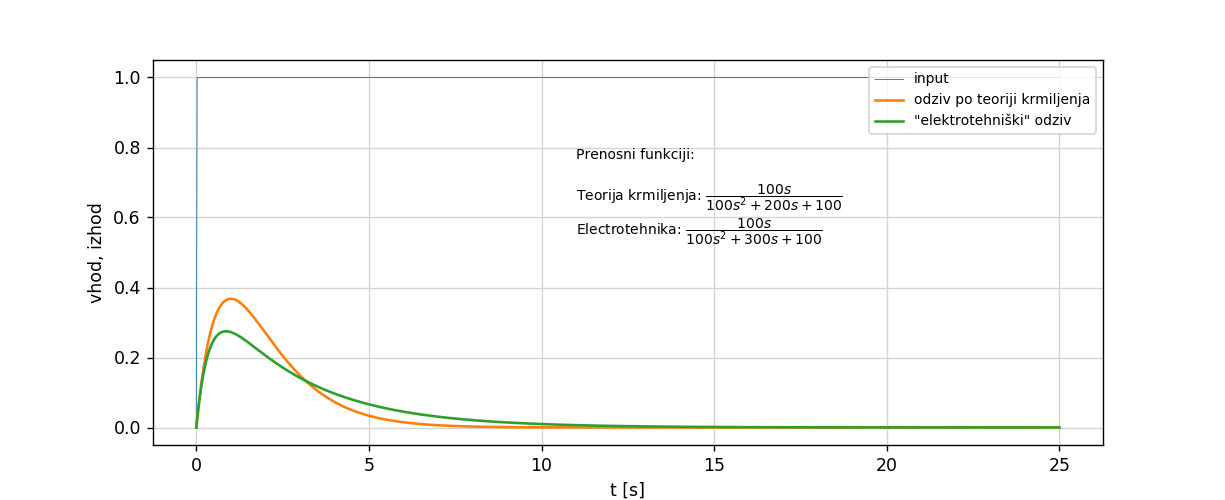

interactive(children=(IntSlider(value=10, description='$R_1$', max=300, min=1), IntSlider(value=10, descriptio…

In [3]:
num_of_samples = 100
total_time = 25
t = np.linspace(0, total_time, num_of_samples*10)# time for which response is calculated (start, stop, step)

# making step function (for plotting)
step_function = np.ones(len(t))
step_function[0]=0

# make figure
fig = plt.figure(figsize=(9.8, 4),num='Obremenitveni problem - časovni odziv sistema')

# add axes
ax = fig.add_subplot(111)
ax.set_xlabel('t [s]')
ax.set_ylabel('vhod, izhod')

ax.grid(which='both', axis='both', color='lightgray')


# plot step function and responses (initalisation)
ax.plot(t, step_function, lw=.5, label='input')

resp1, = ax.plot([], [], lw=1.5, label='odziv po teoriji krmiljenja')
resp2, = ax.plot([], [], lw=1.5, label='"elektrotehniški" odziv')
ax.legend(loc=1, fontsize=8)

R1=1
L1=1
R2=1
L2=1

eq = ax.text((-ax.get_xlim()[0]+ax.get_xlim()[1])*.4, (-ax.get_ylim()[0]+ax.get_ylim()[1])*.5, '',fontsize=8)
# eq.set_bbox(dict(facecolor='b', alpha=0.07, edgecolor='red'))

plt.show()

def set_input(R1=10, R2=20, L1=20, L2=4):
    # make transfer functions (with scipy)
    control_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L2, R1*R2])
    electro_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L1+R1*L2, R1*R2])
    # calculate step response (with scipy)
    time1, response1 = signal.step(control_transfer, T=t)
    time2, response2 = signal.step(electro_transfer, T=t)

    # update responses plots
    resp1.set_data(time1, response1)
    resp2.set_data(time2, response2)
    
    plt.show()
    
    #update strings for equations
    niz_gor_con = str(R2*L1) + 's'
    niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
    niz_gor_ele = str(R2*L1) + 's'
    niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)
    #update equations
    tekst = 'Prenosni funkciji:\n\nTeorija krmiljenja: $\dfrac{' + niz_gor_con + '}{' + niz_dol_con + '}$\nElektrotehnika: $\dfrac{' + niz_gor_ele + '}{' + niz_dol_ele + '}$'
    eq.set_text(tekst)

# make string to show equations
niz_gor_con = str(R2*L1) + 's'
niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
niz_gor_ele = str(R2*L1) + 's'
niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)

interact(set_input, R1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_1$'),
         R2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_2$'),
         L1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_1$'),
         L2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_2$'));
